In [1]:
import pandas as pd
import numpy as np
import ast
pd.set_option('display.max_columns', None)

**Чтение данных**

С начала сделаем так, чтобы данные можно было прочитать

In [2]:
def customParser(data):
    d1 = eval(data)
    if len(d1) == 0:
        d1 = float("nan")
    return d1

In [3]:
credits = pd.read_csv('the-movies-dataset/credits.csv', converters={'cast':customParser, 'crew':customParser})
credits.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': 'Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

In [4]:
credits['cast'][1][2]['name'], credits['cast'][0][0]['name']

('Kirsten Dunst', 'Tom Hanks')

In [5]:
movieInfo = pd.read_csv('the-movies-dataset/movies_metadata.csv', converters={'production_companies':customParser, 'production_countries':customParser, 'genres':customParser, 'spoken_languages':customParser})

In [6]:
movieInfo['production_companies'][2][0]['name']

'Warner Bros.'

In [7]:
movieInfo['belongs_to_collection'] = movieInfo['belongs_to_collection'].apply(lambda x: eval(x) if x == x else x)

In [8]:
movieInfo['belongs_to_collection'][0]['name']

'Toy Story Collection'

In [9]:
keywords = pd.read_csv('the-movies-dataset/keywords.csv', converters={'keywords':customParser})
keywords.head()

id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4  11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...

**Объединяем данные**

In [10]:
bigInfo = pd.merge(credits, movieInfo, on='id')
bigInfo.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': 'Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  adult  \
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  False   
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  False   
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  False   
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  False   
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862  False   

                               belongs_to_collection    budget  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1                                                NaN  65000000   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3                                                NaN  16000000   
4  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage    imdb_id original_language  \
0  http://toystory.disney.com/toy-story  tt0114709                en   
1                                   NaN  tt0113497                en   
2                                   NaN  tt0113228                en   
3                                   NaN  tt0114885                en   
4                                   NaN  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  When siblings Judy and Peter discover an encha...   17.015539   
2  A family wedding reignites the ancient feud be...   11.712900   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   
4  Just when George Banks has recovered from his ...    8.387519   

                        poster_path  \
0  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
1  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   
2  /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg   
3  /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg   
4  /e64sOI48hQXyru7naBFyssKFxVd.jpg   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries release_date    revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30  373554033   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15  262797249   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22          0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   81452156   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-02-10   76578911   

   runtime                                   spoken_languages    status  \
0     81.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1    104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2    101.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3    127.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4    106.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

     

In [11]:
megaInfo = pd.merge(bigInfo, keywords, on='id')
megaInfo.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': 'Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  adult  \
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  False   
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  False   
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  False   
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  False   
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862  False   

                               belongs_to_collection    budget  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1                                                NaN  65000000   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3                                                NaN  16000000   
4  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage    imdb_id original_language  \
0  http://toystory.disney.com/toy-story  tt0114709                en   
1                                   NaN  tt0113497                en   
2                                   NaN  tt0113228                en   
3                                   NaN  tt0114885                en   
4                                   NaN  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  When siblings Judy and Peter discover an encha...   17.015539   
2  A family wedding reignites the ancient feud be...   11.712900   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   
4  Just when George Banks has recovered from his ...    8.387519   

                        poster_path  \
0  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
1  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   
2  /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg   
3  /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg   
4  /e64sOI48hQXyru7naBFyssKFxVd.jpg   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries release_date    revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30  373554033   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15  262797249   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22          0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   81452156   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-02-10   76578911   

   runtime                                   spoken_languages    status  \
0     81.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1    104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2    101.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3    127.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4    106.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

     

In [12]:
megaInfo.shape

(46628, 27)

**Преобразование данных**

Теперь я удалю из списка все, что мне 100% не пригодится. Преобразую некоторые категориальные переменные, которые уже есть, в нормальный вид. Добавлю еще парочку переменных (число актеров, число жанров, размер съёмачной группы). Посмотрю на получившиеся данные и выберу целевую переменную

In [13]:
megaInfo = megaInfo.drop(['belongs_to_collection', 'homepage', 'imdb_id', 'poster_path', 'status', 
                          'video', 'original_language'], axis=1)

In [14]:
megaInfo['adult'] = megaInfo['adult'].map({False:0, True:1})

In [15]:
megaInfo['cast_count'] = megaInfo.cast.apply(lambda x: len(x) if x == x else x)

In [16]:
megaInfo['genres_count'] = megaInfo.genres.apply(lambda x: len(x) if x == x else x)

In [17]:
megaInfo['crew_count'] = megaInfo.crew.apply(lambda x: len(x) if x == x else x)

In [18]:
megaInfo['keywords_count'] = megaInfo.keywords.apply(lambda x: len(x) if x == x else x)

In [19]:
megaInfo['production_companies_count'] = megaInfo.production_companies.apply(lambda x: len(x) if x == x else x)

In [20]:
megaInfo['production_countries_count'] = megaInfo.production_countries.apply(lambda x: len(x) if x == x else x)

In [21]:
megaInfo['spoken_languages_count'] = megaInfo.spoken_languages.apply(lambda x: len(x) if x == x else x)

In [22]:
megaInfo['profit'] = megaInfo['revenue'].sub(megaInfo['budget'], axis = 0) 

In [23]:
megaInfo.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': 'Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  adult    budget  \
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862      0  30000000   
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844      0  65000000   
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602      0         0   
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357      0  16000000   
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862      0         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  popularity  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   
1  When siblings Judy and Peter discover an encha...   17.015539   
2  A family wedding reignites the ancient feud be...   11.712900   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   
4  Just when George Banks has recovered from his ...    8.387519   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries release_date    revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30  373554033   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15  262797249   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22          0   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   81452156   
4  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-02-10   76578911   

   runtime                                   spoken_languages  \
0     81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1    104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2    101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3    127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4    106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

                                             tagline  \
0                                                NaN   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just When His World Is Back To Normal... He's ...   

                         title  vote_average  vote_count  \
0                    Toy Story           7.7        5415   
1                      Jumanji           6.9        2413   
2             Grumpier Old Men           6.5          92   
3            Waiting to Exhale           6.1          34   
4  Father of the Bride Part II           5.7         173   

                                            keywords  cast_count  \
0  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...        13.0   
1  [{'id': 10090, 'name': 'board game'}, {'id': 1...        26.0   
2  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...         7.0   
3  [{'id': 818, 'name': 'based on novel'}, {'id':...        10.0   
4  [{'id': 1009, 'name': 'baby'}

 В некоторых полях вместо пропуска стоят 0, я верну пропуски на место, чтобы оценить число заполненных строк. Потом, при необходимости, вместо nan внесу некоторое значение или удалю эти поля нафиг.

In [24]:
megaInfo['budget'] = megaInfo.budget.apply(lambda x: float('nan') if x == 0 else x)

In [25]:
megaInfo['revenue'] = megaInfo.revenue.apply(lambda x: float('nan') if x == 0 else x)

In [26]:
megaInfo['vote_count'] = megaInfo.vote_count.apply(lambda x: float('nan') if x == 0 else x)

In [27]:
megaInfo['vote_average'] = megaInfo.vote_average.apply(lambda x: float('nan') if x == 0 else x)

In [28]:
megaInfo['runtime'] = megaInfo.runtime.apply(lambda x: float('nan') if float(x) == 0 else x)

In [29]:
megaInfo['popularity'] = megaInfo.popularity.apply(lambda x: float('nan') if float(x) == 0 else x)

In [30]:
megaInfo['profit'] = megaInfo.profit.apply(lambda x: float('nan') if x == 0 else x)

Теперь можно посмотреть на данные

In [32]:
megaInfo.describe()

id         adult        budget    popularity       revenue  \
count   46628.000000  46628.000000  9.053000e+03  46561.000000  7.537000e+03   
mean   109678.820837      0.000193  2.144505e+07      2.898465  6.821719e+07   
std    112908.126984      0.013892  3.415291e+07      5.953511  1.458936e+08   
min         2.000000      0.000000  1.000000e+00      0.000001  1.000000e+00   
25%     26760.250000      0.000000  2.000000e+06      0.385288  2.300000e+06   
50%     61299.000000      0.000000  8.000000e+06      1.118792  1.662719e+07   
75%    159624.000000      0.000000  2.500000e+07      3.620977  6.613263e+07   
max    469172.000000      1.000000  3.800000e+08    547.488298  2.787965e+09   

            runtime  vote_average    vote_count    cast_count  genres_count  \
count  44737.000000  43507.000000  43607.000000  44137.000000  44104.000000   
mean      97.507745      6.014269    115.654872     13.008678      2.116407   
std       34.622673      1.256850    502.113927     11.981503      1.055651   
min        1.000000      0.500000      1.000000      1.000000      1.000000   
25%       86.000000      5.300000      4.000000      6.000000      1.000000   
50%       95.000000      6.100000     11.000000     10.000000      2.000000   
75%      107.000000      6.800000     38.000000     15.000000      3.000000   
max     1256.000000     10.000000  14075.000000    313.000000      8.000000   

         crew_count  keywords_count  production_companies_count  \
count  45830.000000    31739.000000                34350.000000   
mean      10.328868        5.023504                    2.105211   
std       15.792203        4.898987                    1.730948   
min        1.000000        1.000000                    1.000000   
25%        2.000000        2.000000                    1.000000   
50%        6.000000        4.000000                    2.000000   
75%       12.000000        6.000000                    3.000000   
max      435.000000      149.000000                   26.000000   

       production_countries_count  spoken_languages_count        profit  
count                40136.000000            42671.000000  1.111200e+04  
mean                     1.264276                1.278433  2.879868e+07  
std                      0.686807                0.691489  1.029185e+08  
min                      1.000000                1.000000 -1.657101e+08  
25%                      1.000000                1.000000 -3.000000e+06  
50%                      1.000000                1.000000  3.948100e+04  
75%                      1.000000                1.000000  1.803927e+07  
max                     25.000000               19.000000  2.550965e+09

Я хотела сначала предсказывать выручку, по входящим данным, но выходит, что не получится тк инфа о выручке есть только в 7537 данных. С бюджетом тоже надо будет что-то придумать, тк инфа о нем тоже мало где имеется. Пропуски есть почти везде, но это не так критично, как 2 переменные, которые я выше описала. Тут их можно будет удалить.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130b460d0>,
      dtype=object)

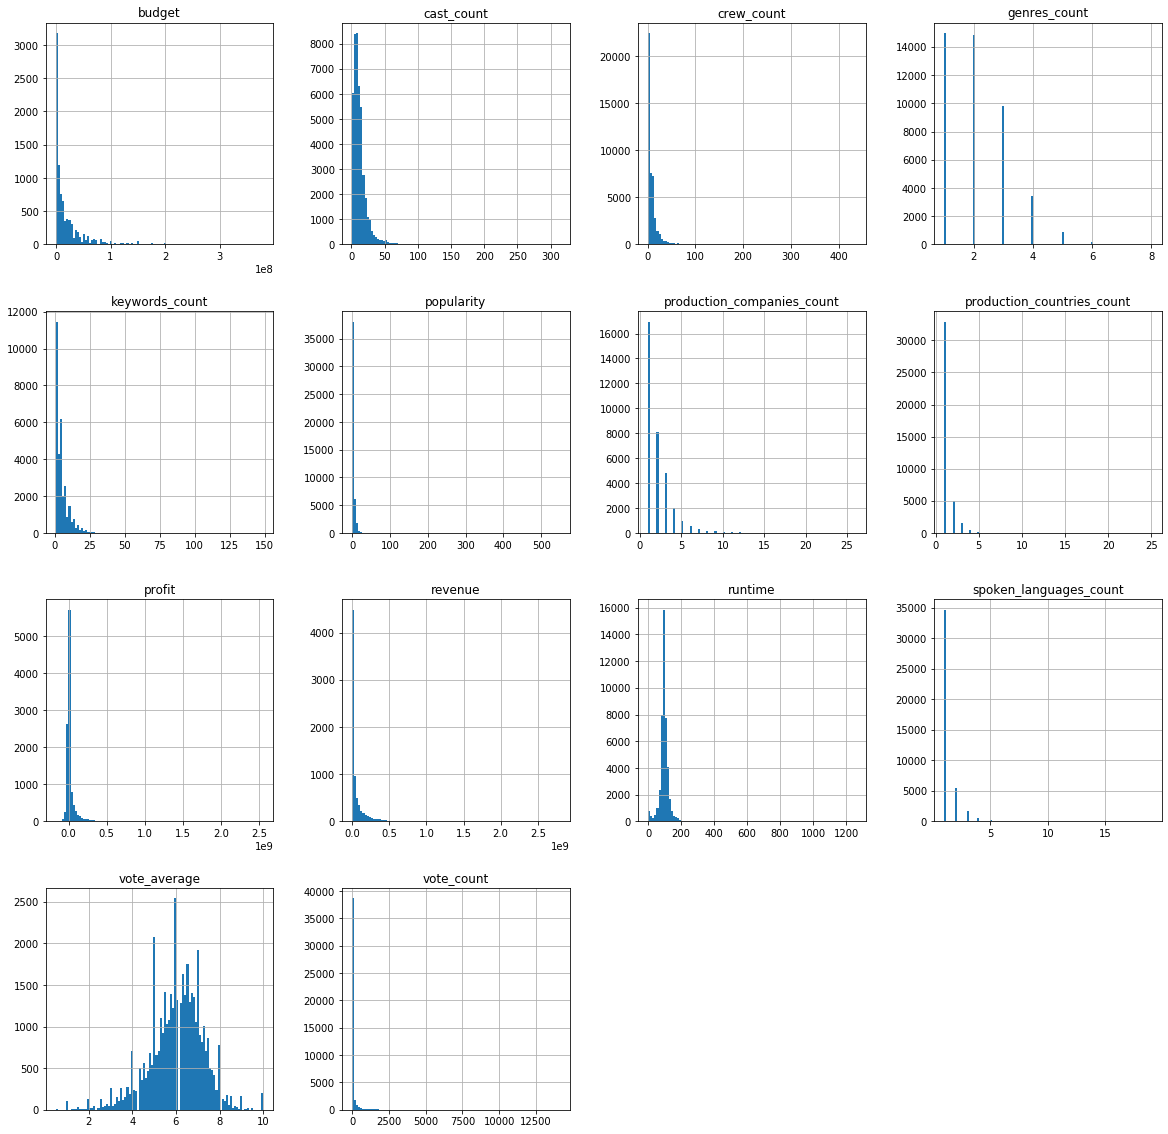

In [33]:
megaInfo[
    ['budget', 'revenue', 'runtime', 'vote_average', 'popularity', 'production_companies_count', 
          'vote_count', 'cast_count', 'genres_count', 'crew_count', 'keywords_count', 'production_countries_count',
    'spoken_languages_count', 'profit']
].hist(figsize=(20,20), bins=100)

Фильмов для взрослых почти нет, возможно эту переменную можно будет убрать вообще. Актерский состав (cast_count) в основном включает от 0 до 75 человек. Число людей на съёмочной (crew_count) площадке в среднем от 0 до 50 человек. Жанров всего 9 и в основном у фильма 1 или 2 жанра. Среднее число ключевых слов (keyword_count) 0 - 25. Число компаний производителей (production_companies_count) 1 - 12. У фильмов в основном 1 - 5 стран производителей. Средняя продолжительность фильмов примерно 100 минут. 

Созраним dataset

In [34]:
megaInfo.to_csv('movieMegaInfo.csv', sep=';')

**Выделим категориальные признаки из стран, жанров**

In [ ]:
def execUniquenames (fullInfo):
    uniqueList = []
#     print(len(fullInfo))
    for i in range(len(fullInfo)):
#         print(i)
        if fullInfo[i] == fullInfo[i]:
            for j in range (len(fullInfo[i])):
                if fullInfo[i][j]['name'] not in uniqueList:
                    uniqueList.append(fullInfo[i][j]['name'])
    return uniqueList

In [ ]:
geners = execUniquenames(megaInfo['genres'])
geners

In [34]:
def hasUniqueValue(data, name):
    for i in range(len(data)):
        if data[i]['name'] == name:
            return 1
    return 0

In [35]:
for i in range(len(geners)):
    megaInfo['gener '+ geners[i]] = megaInfo['genres'].apply(lambda x: hasUniqueValue(x, geners[i]) if x == x else 0)

In [ ]:
countries = execUniquenames(megaInfo['production_countries'])
countries, len(countries)

In [37]:
for i in range(len(countries)):
    megaInfo['country ' + countries[i]] = megaInfo['production_countries'].apply(lambda x: hasUniqueValue(x, countries[i]) if x == x else 0)

Хотела также добавить к списку категорий актеров и компании производители, но получилось очень долго и тяжело для компа, поэтому исключила из списка на рассмотрение

In [88]:
# companies = execUniquenames(megaInfo['production_companies'])
# companies, len(companies)

In [89]:
# for i in range(len(companies)):
#     print(i)
#     megaInfo['company ' + companies[i]] = megaInfo['production_companies'].apply(lambda x: hasUniqueValue(x, companies[i]) if x == x else 0)

In [38]:
# cats = execUniquenames(megaInfo['cast'])
# cats, len(cats)

In [91]:
# spokenLanguages = execUniquenames(megaInfo['spoken_languages'])
# spokenLanguages, len(spokenLanguages)

In [92]:
# for i in range(len(spokenLanguages)):
#     megaInfo['language ' + spokenLanguages[i]] = megaInfo['spoken_languages'].apply(lambda x: hasUniqueValue(x, spokenLanguages[i]) if x == x else 0)

In [93]:
# megaInfo.to_csv('movieMegaInfoWithCategor.csv', sep=';')

In [94]:
# megaInfo[0:10]

**Добавляем инфу о странах**

Это нужно для того чтобы посмотреть на данные в power bi

In [39]:
megaInfo[['id', 'release_date']].loc[2].values.tolist()

[15602, '1995-12-22']

In [ ]:
copyMovieInfoWithCountries = pd.DataFrame()
for i in range(len(megaInfo)):
#     print(i)
    copy = [megaInfo[['id', 'genres', 'release_date','budget', 'revenue', 'runtime', 'vote_average', 'profit', 'production_companies_count', 
          'vote_count', 'cast_count', 'genres_count', 'crew_count', 'production_countries_count',
    'spoken_languages_count']].loc[i].values.tolist()]
    if megaInfo['production_countries'][i] == megaInfo['production_countries'][i]:
        for j in range(len(megaInfo['production_countries'][i])):
            if j != 0:
                copy[0] = copy[0][:-1]
            copy[0].append(megaInfo['production_countries'][i][j]['name'])
            copyMovieInfoWithCountries = copyMovieInfoWithCountries.append(copy)
    else:
        copy[0].append(float('nan'))
        copyMovieInfoWithCountries = copyMovieInfoWithCountries.append(copy)

In [61]:
copyMovieInfoWithCountries = copyMovieInfoWithCountries.rename(columns={0: "id", 1: "geners", 2: "release_date", 3: "budget", 4: "revenue", 5:"runtime", 6:"vote_average", 7:"profit", 8:"production_companies_count", 9:"vote_count", 10:"cast_count", 11:"genres_count",12:"crew_count",13:"production_countries_count", 14:"spoken_languages_count", 15:"country"})
copyMovieInfoWithCountries

id                                             geners release_date  \
0      862  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   1995-10-30   
0     8844  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   1995-12-15   
0    15602  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   1995-12-22   
0    31357  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   1995-12-22   
0    11862                     [{'id': 35, 'name': 'Comedy'}]   1995-02-10   
..     ...                                                ...          ...   
0   439050  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...          NaN   
0   111109                      [{'id': 18, 'name': 'Drama'}]   2011-11-17   
0    67758  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   2003-08-01   
0   227506                                                NaN   1917-10-21   
0   461257                                                NaN   2017-06-09   

        budget      revenue  runtime  vote_average       profit  \
0   30000000.0  373554033.0     81.0           7.7  343554033.0   
0   65000000.0  262797249.0    104.0           6.9  197797249.0   
0          NaN          NaN    101.0           6.5          NaN   
0   16000000.0   81452156.0    127.0           6.1   65452156.0   
0          NaN   76578911.0    106.0           5.7   76578911.0   
..         ...          ...      ...           ...          ...   
0          NaN          NaN     90.0           4.0          NaN   
0          NaN          NaN    360.0           9.0          NaN   
0          NaN          NaN     90.0           3.8          NaN   
0          NaN          NaN     87.0           NaN          NaN   
0          NaN          NaN     75.0           NaN          NaN   

    production_companies_count  vote_count  cast_count  genres_count  \
0                          1.0      5415.0        13.0           3.0   
0                          3.0      2413.0        26.0           3.0   
0                          2.0        92.0         7.0           2.0   
0                          1.0        34.0        10.0           3.0   
0                          2.0       173.0        12.0           1.0   
..                         ...         ...         ...           ...   
0                          NaN         1.0         3.0           2.0   
0                          1.0         3.0        11.0           1.0   
0                          1.0         6.0        15.0           3.0   
0                          1.0         NaN         5.0           NaN   
0                          NaN         NaN         NaN           NaN   

    crew_count  production_countries_count  spoken_languages_count  \
0        106.0                         1.0                     1.0   
0         16.0                         1.0                     2.0   
0          4.0                         1.0                     1.0   
0         10.0                         1.0                     1.0   
0          7.0                         1.0                     1.0   
..         ...                         ...                     ...   
0          9.0                         1.0                     1.0   
0          6.0                         1.0                     1.0   
0          5.0                         1.0                     1.0   
0          2.0                         1.0                     NaN   
0          1.0                         1.0                     1.0   

                     country  
0   United States of America  
0   United States of America  
0   United States of America  
0   United States of America  
0   United States of America  
..                       ...  
0                       Iran  
0                Philippines  
0   United States of America  
0                     Russia  
0             United Kingdom  

[57235 rows x 16 columns]

In [62]:
copyMovieInfoWithCountries = copyMovieInfoWithCountries.reset_index()

In [ ]:
copyMovieInfoWithCountriesAndGeners = pd.DataFrame()
for i in range(len(copyMovieInfoWithCountries)):
#     print(i)
    copy = [copyMovieInfoWithCountries[['id', 'country', 'release_date','budget', 'revenue', 'runtime', 'vote_average', 'profit', 'production_companies_count', 
          'vote_count', 'cast_count', 'genres_count', 'crew_count', 'production_countries_count',
    'spoken_languages_count']].loc[i].values.tolist()]
    if copyMovieInfoWithCountries['geners'][i] == copyMovieInfoWithCountries['geners'][i]:
        for j in range(len(copyMovieInfoWithCountries['geners'][i])):
            if j != 0:
                copy[0] = copy[0][:-1]
            copy[0].append(copyMovieInfoWithCountries['geners'][i][j]['name'])
            copyMovieInfoWithCountriesAndGeners = copyMovieInfoWithCountriesAndGeners.append(copy)
    else:
        copy[0].append(float('nan'))
        copyMovieInfoWithCountriesAndGeners = copyMovieInfoWithCountriesAndGeners.append(copy)

In [64]:
copyMovieInfoWithCountriesAndGeners = copyMovieInfoWithCountriesAndGeners.rename(columns={0: "id", 1: "country", 2: "release_date", 3: "budget", 4: "revenue", 5:"runtime", 6:"vote_average", 7:"profit", 8:"production_companies_count", 9:"vote_count", 10:"cast_count", 11:"genres_count",12:"crew_count",13:"production_countries_count", 14:"spoken_languages_count", 15:"gener"})
copyMovieInfoWithCountriesAndGeners

id                   country release_date      budget      revenue  \
0      862  United States of America   1995-10-30  30000000.0  373554033.0   
0      862  United States of America   1995-10-30  30000000.0  373554033.0   
0      862  United States of America   1995-10-30  30000000.0  373554033.0   
0     8844  United States of America   1995-12-15  65000000.0  262797249.0   
0     8844  United States of America   1995-12-15  65000000.0  262797249.0   
..     ...                       ...          ...         ...          ...   
0    67758  United States of America   2003-08-01         NaN          NaN   
0    67758  United States of America   2003-08-01         NaN          NaN   
0    67758  United States of America   2003-08-01         NaN          NaN   
0   227506                    Russia   1917-10-21         NaN          NaN   
0   461257            United Kingdom   2017-06-09         NaN          NaN   

    runtime  vote_average       profit  production_companies_count  \
0      81.0           7.7  343554033.0                         1.0   
0      81.0           7.7  343554033.0                         1.0   
0      81.0           7.7  343554033.0                         1.0   
0     104.0           6.9  197797249.0                         3.0   
0     104.0           6.9  197797249.0                         3.0   
..      ...           ...          ...                         ...   
0      90.0           3.8          NaN                         1.0   
0      90.0           3.8          NaN                         1.0   
0      90.0           3.8          NaN                         1.0   
0      87.0           NaN          NaN                         1.0   
0      75.0           NaN          NaN                         NaN   

    vote_count  cast_count  genres_count  crew_count  \
0       5415.0        13.0           3.0       106.0   
0       5415.0        13.0           3.0       106.0   
0       5415.0        13.0           3.0       106.0   
0       2413.0        26.0           3.0        16.0   
0       2413.0        26.0           3.0        16.0   
..         ...         ...           ...         ...   
0          6.0        15.0           3.0         5.0   
0          6.0        15.0           3.0         5.0   
0          6.0        15.0           3.0         5.0   
0          NaN         5.0           NaN         2.0   
0          NaN         NaN           NaN         1.0   

    production_countries_count  spoken_languages_count      gener  
0                          1.0                     1.0  Animation  
0                          1.0                     1.0     Comedy  
0                          1.0                     1.0     Family  
0                          1.0                     2.0  Adventure  
0                          1.0                     2.0    Fantasy  
..                         ...                     ...        ...  
0                          1.0                     1.0     Action  
0                          1.0                     1.0      Drama  
0                          1.0                     1.0   Thriller  
0                          1.0                     NaN        NaN  
0                          1.0                     1.0        NaN  

[119688 rows x 16 columns]

In [65]:
copyMovieInfoWithCountriesAndGeners.to_csv('copyMovieInfoWithCountriesAndGeners.csv')

In [710]:
copyMovieInfo.to_csv('copyMovieInfo.csv')

**Корреляция признаков**

Посмотрим на корреляцию признаков

In [481]:
import warnings
warnings.filterwarnings("ignore")

import seaborn
%matplotlib inline

In [482]:
corelac = megaInfo[
    ['budget', 'revenue', 'runtime', 'vote_average', 'popularity', 'production_companies_count', 
          'vote_count', 'cast_count', 'genres_count', 'crew_count', 'keywords_count', 'production_countries_count',
    'spoken_languages_count', 'profit']
].dropna()

In [483]:
corelac.shape

(5439, 14)

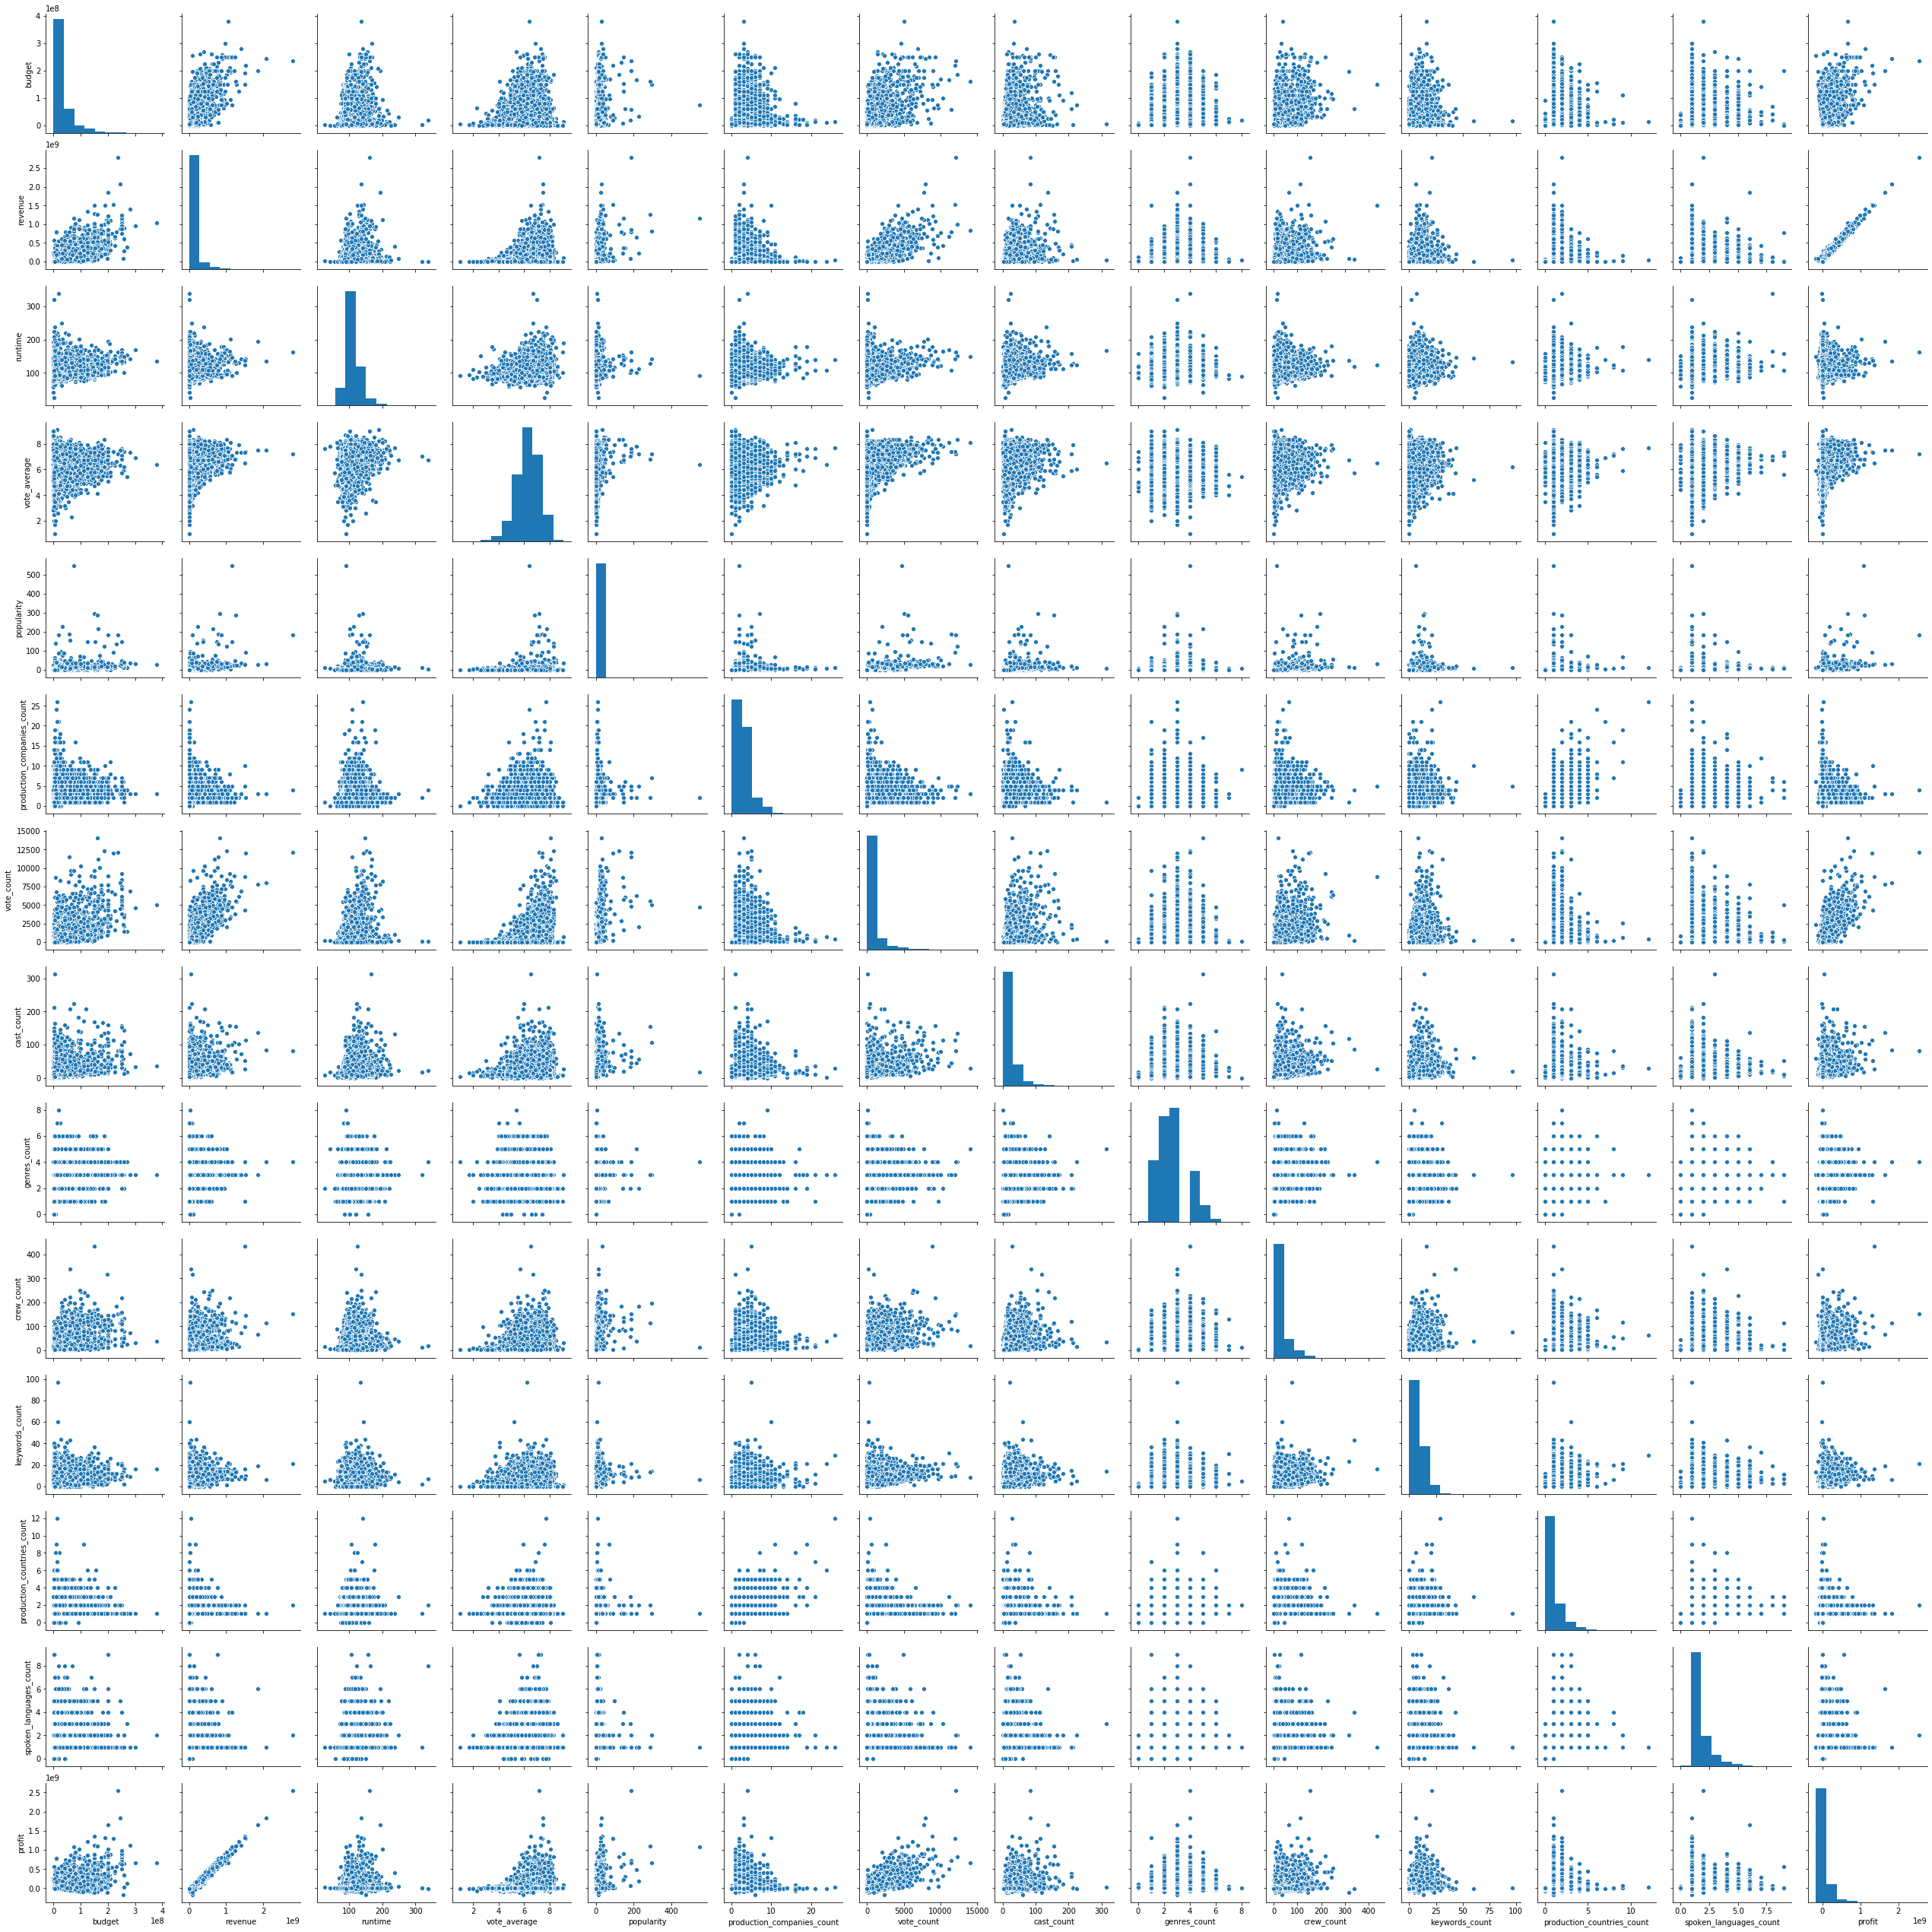

In [521]:
g = seaborn.pairplot(corelac)

In [485]:
from sklearn.preprocessing import MinMaxScaler 
# Нормализуем данные
mms = MinMaxScaler()
mms.fit(corelac)
corelac_transformed = mms.transform(corelac)

In [486]:
import matplotlib.pyplot as plt  

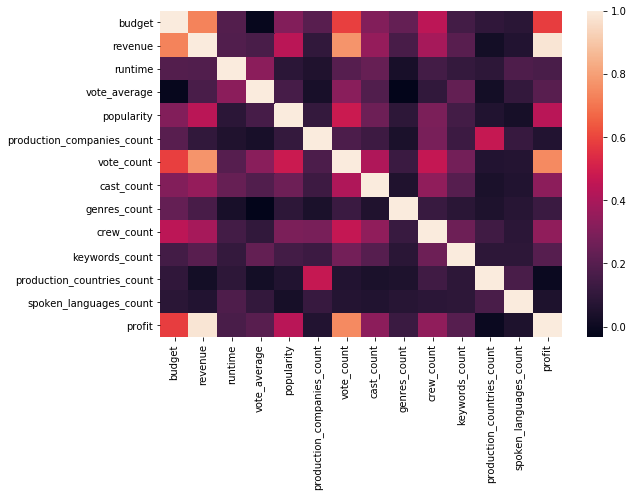

In [487]:
f, ax = plt.subplots(figsize=(9, 6))
corr = corelac.corr()
seaborn.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
               ax=ax)
plt.show()

Тут видно что корреляция у почти у всех признаков нулевая, за исключением выручки, бюджета и кассового сбора. ЧТо в принципе и в Power BI видно.

In [298]:
corelac.to_csv('movieMegaInfoSmallData.csv')

**Глубинный анализ**

In [42]:
megaInfo

cast  \
0      [{'cast_id': 14, 'character': 'Woody (voice)',...   
1      [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2      [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3      [{'cast_id': 1, 'character': 'Savannah 'Vannah...   
4      [{'cast_id': 1, 'character': 'George Banks', '...   
...                                                  ...   
46623  [{'cast_id': 0, 'character': '', 'credit_id': ...   
46624  [{'cast_id': 1002, 'character': 'Sister Angela...   
46625  [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...   
46626  [{'cast_id': 2, 'character': '', 'credit_id': ...   
46627                                                NaN   

                                                    crew      id  adult  \
0      [{'credit_id': '52fe4284c3a36847f8024f49', 'de...     862      0   
1      [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...    8844      0   
2      [{'credit_id': '52fe466a9251416c75077a89', 'de...   15602      0   
3      [{'credit_id': '52fe44779251416c91011acb', 'de...   31357      0   
4      [{'credit_id': '52fe44959251416c75039ed7', 'de...   11862      0   
...                                                  ...     ...    ...   
46623  [{'credit_id': '5894a97d925141426c00818c', 'de...  439050      0   
46624  [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...  111109      0   
46625  [{'credit_id': '52fe4776c3a368484e0c8387', 'de...   67758      0   
46626  [{'credit_id': '533bccebc3a36844cf0011a7', 'de...  227506      0   
46627  [{'credit_id': '593e676c92514105b702e68e', 'de...  461257      0   

           budget                                             genres  \
0      30000000.0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      65000000.0  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2             NaN  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      16000000.0  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4             NaN                     [{'id': 35, 'name': 'Comedy'}]   
...           ...                                                ...   
46623         NaN  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
46624         NaN                      [{'id': 18, 'name': 'Drama'}]   
46625         NaN  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
46626         NaN                                                NaN   
46627         NaN                                                NaN   

                    original_title  \
0                        Toy Story   
1                          Jumanji   
2                 Grumpier Old Men   
3                Waiting to Exhale   
4      Father of the Bride Part II   
...                            ...   
46623                      رگ خواب   
46624          Siglo ng Pagluluwal   
46625                     Betrayal   
46626          Satana likuyushchiy   
46627                     Queerama   

                                                overview  popularity  \
0      Led by Woody, Andy's toys live happily in his ...   21.946943   
1      When siblings Judy and Peter discover an encha...   17.015539   
2      A family wedding reignites the ancient feud be...   11.712900   
3      Cheated on, mistreated and stepped on, the wom...    3.859495   
4      Just when George Banks has recovered from his ...    8.387519   
...                                                  ...         ...   
46623        Rising and falling between a man and woman.    0.072051   
46624  An artist struggles to finish his work while a...    0.178241   
46625  When one of her hits goes wrong, a professiona...    0.903007   
46626  In a small town live two brothers, one a minis...    0.003503   
46627  50 years after decriminalisation of homosexual...    0.163015   

                                    production_companies  \
0         [{'name': 'Pixar Animation Studios', 'id': 3}]   
1      [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2      [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  

In [43]:
X = megaInfo.drop(['cast', 'crew', 'id', 'adult', 'budget', 'genres', 'original_title', 'overview', 'popularity', 'production_companies',
                          'production_countries', 'release_date', 'revenue', 'spoken_languages', 'tagline', 'title', 'vote_count',
                  'keywords', 'profit', 'keywords_count'], axis=1)

In [44]:
X = X.fillna(0)
X

runtime  vote_average  cast_count  genres_count  crew_count  \
0         81.0           7.7        13.0           3.0       106.0   
1        104.0           6.9        26.0           3.0        16.0   
2        101.0           6.5         7.0           2.0         4.0   
3        127.0           6.1        10.0           3.0        10.0   
4        106.0           5.7        12.0           1.0         7.0   
...        ...           ...         ...           ...         ...   
46623     90.0           4.0         3.0           2.0         9.0   
46624    360.0           9.0        11.0           1.0         6.0   
46625     90.0           3.8        15.0           3.0         5.0   
46626     87.0           0.0         5.0           0.0         2.0   
46627     75.0           0.0         0.0           0.0         1.0   

       production_companies_count  production_countries_count  \
0                             1.0                         1.0   
1                             3.0                         1.0   
2                             2.0                         1.0   
3                             1.0                         1.0   
4                             2.0                         1.0   
...                           ...                         ...   
46623                         0.0                         1.0   
46624                         1.0                         1.0   
46625                         1.0                         1.0   
46626                         1.0                         1.0   
46627                         0.0                         1.0   

       spoken_languages_count  gener Animation  gener Comedy  gener Family  \
0                         1.0                1             1             1   
1                         2.0                0             0             1   
2                         1.0                0             1             0   
3                         1.0                0             1             0   
4                         1.0                0             1             0   
...                       ...              ...           ...           ...   
46623                     1.0                0             0             1   
46624                     1.0                0             0             0   
46625                     1.0                0             0             0   
46626                     0.0                0             0             0   
46627                     1.0                0             0             0   

       gener Adventure  gener Fantasy  gener Romance  gener Drama  \
0                    0              0              0            0   
1                    1              1              0            0   
2                    0              0              1            0   
3                    0              0              1            1   
4                    0              0              0            0   
...                ...            ...            ...          ...   
46623                0              0              0            1   
46624                0              0              0            1   
46625                0              0              0            1   
46626                0              0              0            0   
46627                0              0              0            0   

       gener Action  gener Crime  gener Thriller  gener Horror  gener History  \
0                 0            0               0             0              0   
1                 0            0               0             0              0   
2                 0            0               0             0              0   
3                 0            0               0             0              0   
4                 0            0               0             0              0   
...             ...          ...             ...           ...            ...   
46623             0            0               0    

In [45]:
X.shape

(46628, 188)

In [46]:
from sklearn.preprocessing import MinMaxScaler 
# Нормализуем данные
mms = MinMaxScaler()
mms.fit(X)
X_transformed = mms.transform(X)
X_transformed.shape

(46628, 188)

In [47]:
X_transformed

array([[0.06449045, 0.77      , 0.04153355, ..., 0.        , 0.        ,
        0.        ],
       [0.08280255, 0.69      , 0.08306709, ..., 0.        , 0.        ,
        0.        ],
       [0.08041401, 0.65      , 0.02236422, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07165605, 0.38      , 0.04792332, ..., 0.        , 0.        ,
        0.        ],
       [0.06926752, 0.        , 0.01597444, ..., 0.        , 0.        ,
        0.        ],
       [0.05971338, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [52]:
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from sklearn import manifold
from sklearn.decomposition import PCA, TruncatedSVD

#рисуем штучку, которая сокращает размерность

def plot_TSNE(data, test_labels=[], colors=['orange','blue'], savepath="PCA_demo.csv", plot=True):
        tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
        print(2)
        data_2d_tsne = tsne.fit_transform(data)
        print(1)
        if len(test_labels) > 0:
            color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
            color_column = [color_mapper[label] for label in test_labels]
            if plot:
                plt.scatter(data_2d_tsne[:,0], data_2d_tsne[:,1], s=8, alpha=.8, c=test_labels, cmap=mcolors.ListedColormap(colors))
        elif plot:
            plt.scatter(data_2d_tsne[:,0], data_2d_tsne[:,1], s=8, alpha=.8)
            
def plot_PCA(data, test_labels=[], colors=['orange','blue'], savepath="PCA_demo.csv", plot=True):
        lsa = PCA(n_components=2)
        print(2)
        lsa.fit(data)
        print(1)
        lsa_scores = lsa.transform(data)
        if len(test_labels) > 0:
            color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
            color_column = [color_mapper[label] for label in test_labels]
            if plot:
                plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=mcolors.ListedColormap(colors))
        elif plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8)
            
def plot_LSA(data, test_labels=[], colors=['orange','blue'], savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        print(2)
        lsa.fit(data)
        print(1)
        lsa_scores = lsa.transform(data)
        if len(test_labels) > 0:
            color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
            color_column = [color_mapper[label] for label in test_labels]
            if plot:
                plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=mcolors.ListedColormap(colors))
        elif plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8)

2
1


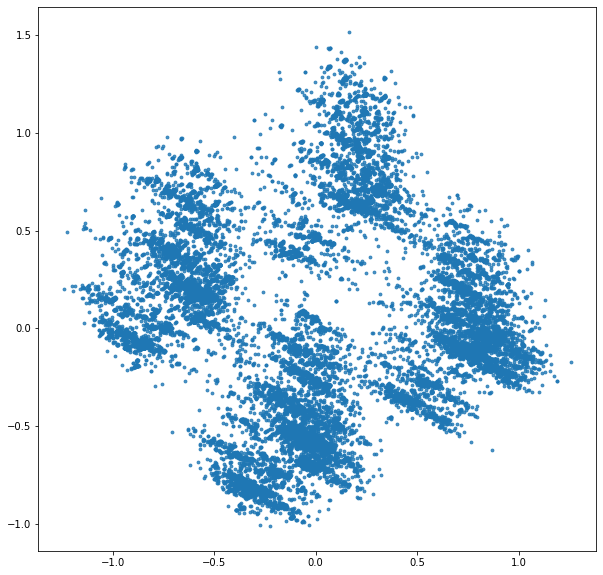

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))          
plot_PCA(X_transformed)
plt.show()

2
1


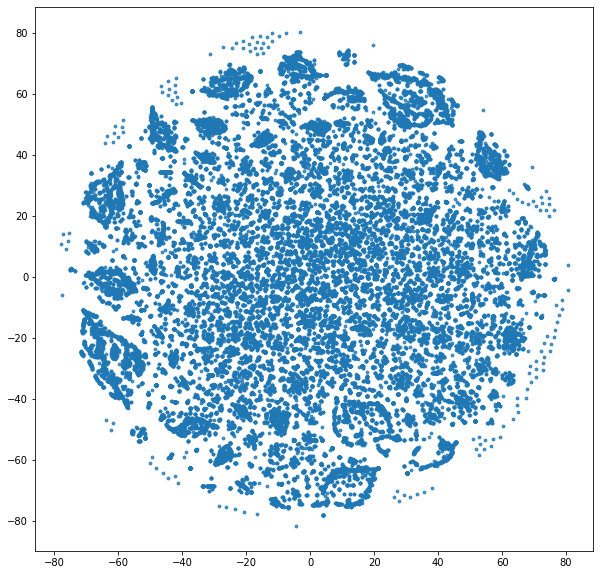

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))          
plot_TSNE(X_transformed)
plt.show()

2
1


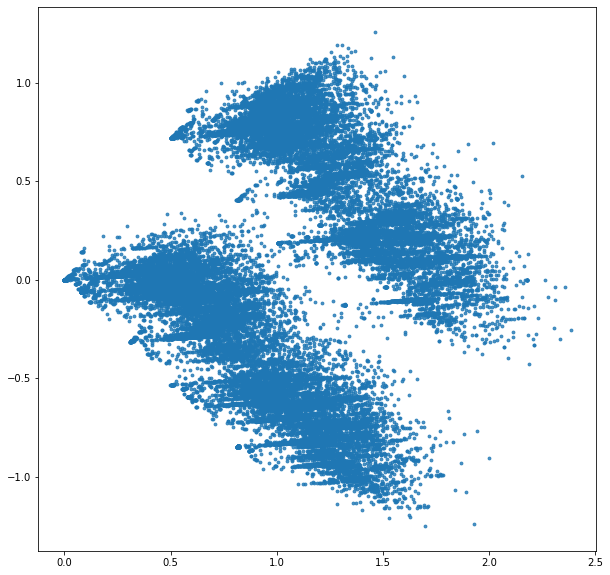

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))          
plot_LSA(X_transformed)
plt.show()

In [51]:
#training k-means model
from sklearn.cluster import KMeans

sum_of_squared_distances_tr = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_transformed)
    sum_of_squared_distances_tr.append(km.inertia_)

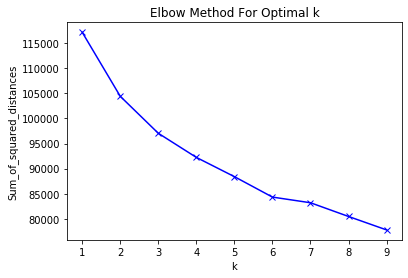

In [53]:
plt.plot(K, sum_of_squared_distances_tr, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Кажется что 2 или 6

2
1


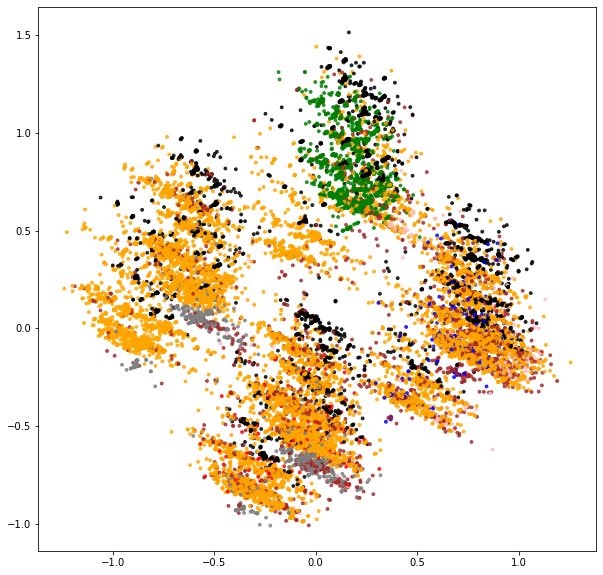

In [114]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=8,random_state=57) #56 - если ничего другого не подойдет для 5
gmm.fit(X_transformed)

#predictions from gmm
gmm_labels = gmm.predict(X_transformed)
fig = plt.figure(figsize=(10, 10))        
plot_PCA(X_transformed, gmm_labels, ['orange','blue', 'green', 'red', 'black', 'pink', 'brown', 'gray'])

2
1


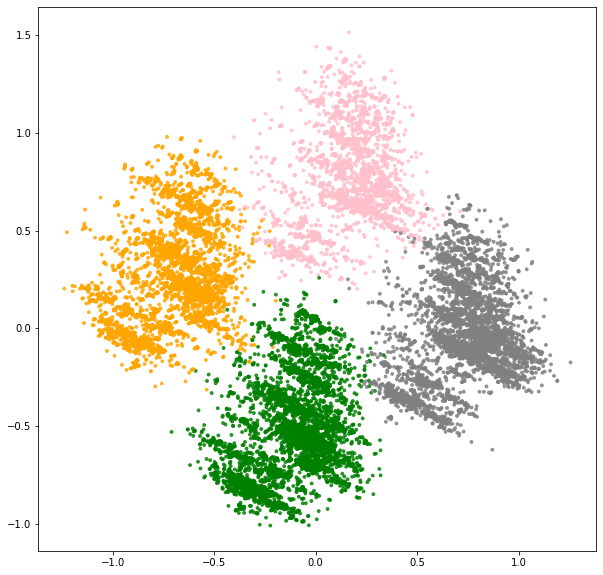

In [97]:
from sklearn.mixture import GaussianMixture
gmm_4 = GaussianMixture(n_components=4,random_state=51) #51 - если ничего другого не подойдет для 4
gmm_4.fit(X_transformed)

#predictions from gmm
gmm_labels_4 = gmm_4.predict(X_transformed)
fig = plt.figure(figsize=(10, 10))        
plot_PCA(X_transformed, gmm_labels_4, ['orange','green','pink', 'gray'])

2
1


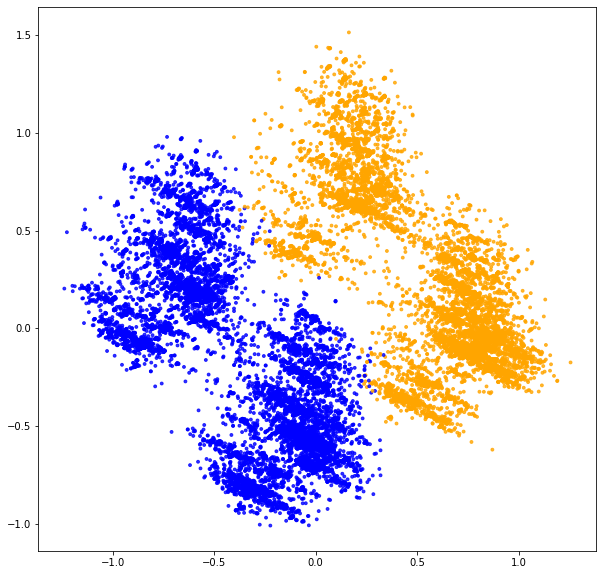

In [105]:
gmm_2 = GaussianMixture(n_components=2,random_state=43) #42
gmm_2.fit(X_transformed)

#predictions from gmm
gmm_labels_2 = gmm_2.predict(X_transformed)
fig = plt.figure(figsize=(10, 10))        
plot_PCA(X_transformed, gmm_labels_2, ['orange','blue'])

2
1


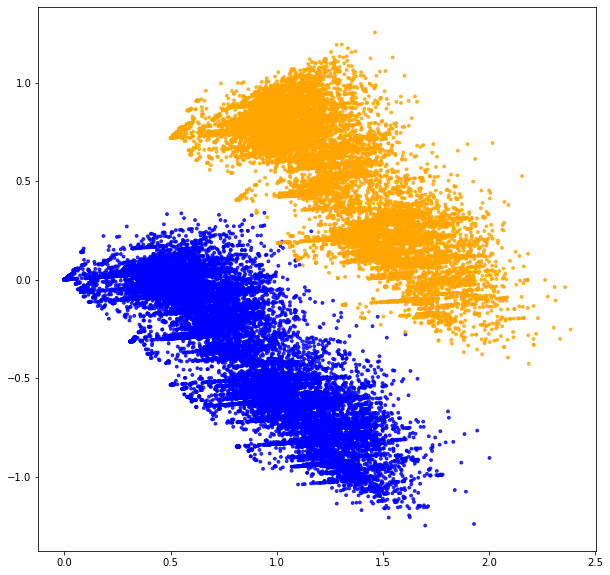

In [99]:
fig = plt.figure(figsize=(10, 10))      
plot_LSA(X_transformed, gmm_labels_2, ['orange','blue'])

In [115]:
set(gmm_labels_4)

{0, 1, 2, 3}

In [118]:
gmm_labels_4.shape, X.shape, type(gmm_labels_4)

((46628,), (46628, 188), numpy.ndarray)

In [135]:
gmm_labels_4

array([0, 0, 0, ..., 2, 1, 1])

In [120]:
X['class'] = gmm_labels_4

In [128]:
X.loc[X['class'] == 0].describe()

runtime  vote_average    cast_count  genres_count    crew_count  \
count  12295.000000  12295.000000  12295.000000  12295.000000  12295.000000   
mean      89.406751      5.444392     14.364701      2.016267     14.151118   
std       31.249164      1.779279     14.293829      1.061120     21.760661   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       82.000000      4.800000      7.000000      1.000000      3.000000   
50%       91.000000      5.800000     11.000000      2.000000      8.000000   
75%      100.000000      6.500000     17.000000      3.000000     15.000000   
max      877.000000     10.000000    313.000000      8.000000    435.000000   

       production_companies_count  production_countries_count  \
count                12295.000000                12295.000000   
mean                     1.688329                    1.206913   
std                      1.460885                    0.597948   
min                      0.000000                    1.000000   
25%                      1.000000                    1.000000   
50%                      1.000000                    1.000000   
75%                      2.000000                    1.000000   
max                     16.000000                   15.000000   

       spoken_languages_count  gener Animation  gener Comedy  gener Family  \
count            12295.000000     12295.000000  12295.000000  12295.000000   
mean                 1.195039         0.069134      0.401139      0.102155   
std                  0.635451         0.253692      0.490149      0.302865   
min                  0.000000         0.000000      0.000000      0.000000   
25%                  1.000000         0.000000      0.000000      0.000000   
50%                  1.000000         0.000000      0.000000      0.000000   
75%                  1.000000         0.000000      1.000000      0.000000   
max                  9.000000         1.000000      1.000000      1.000000   

       gener Adventure  gener Fantasy  gener Romance  gener Drama  \
count     12295.000000   12295.000000   12295.000000      12295.0   
mean          0.125580       0.074339       0.111671          0.0   
std           0.331388       0.262333       0.314975          0.0   
min           0.000000       0.000000       0.000000          0.0   
25%           0.000000       0.000000       0.000000          0.0   
50%           0.000000       0.000000       0.000000          0.0   
75%           0.000000       0.000000       0.000000          0.0   
max           1.000000       1.000000       1.000000          0.0   

       gener Action   gener Crime  gener Thriller  gener Horror  \
count  12295.000000  12295.000000    12295.000000  12295.000000   
mean       0.203172      0.081253        0.200244      0.188288   
std        0.402376      0.273234        0.400199      0.390958   
min        0.000000      0.000000        0.000000      0.000000   
25%        0.000000      0.000000        0.000000      0.000000   
50%        0.000000      0.000000        0.000000      0.000000   
75%        0.000000      0.000000        0.000000      0.000000   
max        1.000000      1.000000        1.000000      1.000000   

       gener History  gener Science Fiction  gener Mystery     gener War  \
count   12295.000000           12295.000000   12295.000000  12295.000000   
mean        0.010167               0.128914       0.060675      0.013583   
std         0.100320               0.335119       0.238743      0.115756   
min         0.000000               0.000000       0.000000      0.000000   
25%         0.000000               0.000000       0.000000      0.000000   
50%         0.000000               0.000000       0.000000      0.000000   
75%         0.000000               0.000000       0.000000      0.000000   
max         1.000000               1.000000       1.000000      1.000000   

       gener Foreign   gener Music  gener Documentary  gener Western  \
count   12295.000000  12295.

In [130]:
X.loc[X['class'] == 1].describe()

runtime  vote_average    cast_count  genres_count    crew_count  \
count  13524.000000  13524.000000  13524.000000  13524.000000  13524.000000   
mean      83.169476      5.331603      8.576457      1.491792      5.674431   
std       46.679282      2.290944      8.179338      1.095192      8.144509   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       76.000000      4.800000      3.000000      1.000000      1.000000   
50%       90.000000      5.900000      7.000000      1.000000      3.000000   
75%      101.000000      6.800000     12.000000      2.000000      7.000000   
max     1140.000000     10.000000    128.000000      7.000000    316.000000   

       production_companies_count  production_countries_count  \
count                13524.000000                13524.000000   
mean                     1.040668                    0.787785   
std                      1.582171                    0.739887   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      1.000000                    1.000000   
75%                      1.000000                    1.000000   
max                     26.000000                    7.000000   

       spoken_languages_count  gener Animation  gener Comedy  gener Family  \
count            13524.000000     13524.000000  13524.000000  13524.000000   
mean                 1.010722         0.067805      0.313443      0.053608   
std                  0.771039         0.251421      0.463910      0.225252   
min                  0.000000         0.000000      0.000000      0.000000   
25%                  1.000000         0.000000      0.000000      0.000000   
50%                  1.000000         0.000000      0.000000      0.000000   
75%                  1.000000         0.000000      1.000000      0.000000   
max                 10.000000         1.000000      1.000000      1.000000   

       gener Adventure  gener Fantasy  gener Romance  gener Drama  \
count     13524.000000   13524.000000   13524.000000      13524.0   
mean          0.071872       0.056122       0.069802          0.0   
std           0.258286       0.230167       0.254822          0.0   
min           0.000000       0.000000       0.000000          0.0   
25%           0.000000       0.000000       0.000000          0.0   
50%           0.000000       0.000000       0.000000          0.0   
75%           0.000000       0.000000       0.000000          0.0   
max           1.000000       1.000000       1.000000          0.0   

       gener Action   gener Crime  gener Thriller  gener Horror  \
count  13524.000000  13524.000000    13524.000000   13524.00000   
mean       0.137681      0.059524        0.135980       0.11816   
std        0.344578      0.236611        0.342781       0.32281   
min        0.000000      0.000000        0.000000       0.00000   
25%        0.000000      0.000000        0.000000       0.00000   
50%        0.000000      0.000000        0.000000       0.00000   
75%        0.000000      0.000000        0.000000       0.00000   
max        1.000000      1.000000        1.000000       1.00000   

       gener History  gener Science Fiction  gener Mystery    gener War  \
count   13524.000000           13524.000000   13524.000000  13524.00000   
mean        0.015010               0.067214       0.043848      0.01294   
std         0.121598               0.250401       0.204764      0.11302   
min         0.000000               0.000000       0.000000      0.00000   
25%         0.000000               0.000000       0.000000      0.00000   
50%         0.000000               0.000000       0.000000      0.00000   
75%         0.000000               0.000000       0.000000      0.00000   
max         1.000000               1.000000       1.000000      1.00000   

       gener Foreign   gener Music  gener Documentary  gener Western  \
count   13524.000000  13524.000000   

In [131]:
X.loc[X['class'] == 2].describe()

runtime  vote_average   cast_count  genres_count   crew_count  \
count  9191.000000    9191.00000  9191.000000   9191.000000  9191.000000   
mean    102.763573       5.79394    16.411816      2.485801    14.200957   
std      30.324673       1.61020    14.843120      1.095043    18.796035   
min       0.000000       0.00000     0.000000      1.000000     0.000000   
25%      90.000000       5.30000     8.000000      2.000000     4.000000   
50%     100.000000       6.10000    13.000000      2.000000     9.000000   
75%     113.000000       6.70000    19.000000      3.000000    16.000000   
max    1256.000000      10.00000   224.000000      8.000000   250.000000   

       production_companies_count  production_countries_count  \
count                 9191.000000                 9191.000000   
mean                     1.901099                    1.250027   
std                      1.593960                    0.697535   
min                      0.000000                    1.000000   
25%                      1.000000                    1.000000   
50%                      1.000000                    1.000000   
75%                      3.000000                    1.000000   
max                     26.000000                   12.000000   

       spoken_languages_count  gener Animation  gener Comedy  gener Family  \
count             9191.000000      9191.000000   9191.000000   9191.000000   
mean                 1.256229         0.006637      0.215319      0.054619   
std                  0.699104         0.081201      0.411066      0.227247   
min                  0.000000         0.000000      0.000000      0.000000   
25%                  1.000000         0.000000      0.000000      0.000000   
50%                  1.000000         0.000000      0.000000      0.000000   
75%                  1.000000         0.000000      0.000000      0.000000   
max                  8.000000         1.000000      1.000000      1.000000   

       gener Adventure  gener Fantasy  gener Romance  gener Drama  \
count      9191.000000    9191.000000    9191.000000       9191.0   
mean          0.066152       0.033946       0.244478          1.0   
std           0.248561       0.181101       0.429801          0.0   
min           0.000000       0.000000       0.000000          1.0   
25%           0.000000       0.000000       0.000000          1.0   
50%           0.000000       0.000000       0.000000          1.0   
75%           0.000000       0.000000       0.000000          1.0   
max           1.000000       1.000000       1.000000          1.0   

       gener Action  gener Crime  gener Thriller  gener Horror  gener History  \
count   9191.000000  9191.000000     9191.000000   9191.000000    9191.000000   
mean       0.136111     0.160374        0.213252      0.045370       0.045044   
std        0.342925     0.366973        0.409627      0.208127       0.207412   
min        0.000000     0.000000        0.000000      0.000000       0.000000   
25%        0.000000     0.000000        0.000000      0.000000       0.000000   
50%        0.000000     0.000000        0.000000      0.000000       0.000000   
75%        0.000000     0.000000        0.000000      0.000000       0.000000   
max        1.000000     1.000000        1.000000      1.000000       1.000000   

       gener Science Fiction  gener Mystery    gener War  gener Foreign  \
count            9191.000000    9191.000000  9191.000000    9191.000000   
mean                0.034490       0.075726     0.047547       0.004461   
std                 0.182495       0.264574     0.212816       0.066644   
min                 0.000000       0.000000     0.000000       0.000000   
25%                 0.000000       0.000000     0.000000       0.000000   
50%                 0.000000       0.000000     0.000000       0.000000   
75%                 0.000000       0.000000     0.000000       0.000000   
max                 1.000000       1.000000     1.000000       1.000000   

       ge

In [132]:
X.loc[X['class'] == 3].describe()

runtime  vote_average    cast_count  genres_count    crew_count  \
count  11618.000000  11618.000000  11618.000000  11618.000000  11618.000000   
mean     102.742641      5.970675     11.251592      2.197452      7.929248   
std       38.838948      1.787782      8.731589      1.043145      8.663826   
min        0.000000      0.000000      0.000000      1.000000      0.000000   
25%       90.000000      5.500000      6.000000      1.000000      2.000000   
50%      100.000000      6.300000      9.000000      2.000000      5.000000   
75%      115.000000      7.000000     14.000000      3.000000     11.000000   
max      931.000000     10.000000    137.000000      8.000000    135.000000   

       production_companies_count  production_countries_count  \
count                11618.000000                11618.000000   
mean                     1.722241                    1.184455   
std                      2.162836                    0.920892   
min                      0.000000                    0.000000   
25%                      0.000000                    1.000000   
50%                      1.000000                    1.000000   
75%                      2.000000                    1.000000   
max                     26.000000                   25.000000   

       spoken_languages_count  gener Animation  gener Comedy  gener Family  \
count            11618.000000     11618.000000  11618.000000  11618.000000   
mean                 1.260458         0.014632      0.199432      0.029954   
std                  0.845867         0.120082      0.399591      0.170466   
min                  0.000000         0.000000      0.000000      0.000000   
25%                  1.000000         0.000000      0.000000      0.000000   
50%                  1.000000         0.000000      0.000000      0.000000   
75%                  1.000000         0.000000      0.000000      0.000000   
max                 19.000000         1.000000      1.000000      1.000000   

       gener Adventure  gener Fantasy  gener Romance  gener Drama  \
count     11618.000000   11618.000000   11618.000000      11618.0   
mean          0.039852       0.034429       0.203047          1.0   
std           0.195620       0.182337       0.402285          0.0   
min           0.000000       0.000000       0.000000          1.0   
25%           0.000000       0.000000       0.000000          1.0   
50%           0.000000       0.000000       0.000000          1.0   
75%           0.000000       0.000000       0.000000          1.0   
max           1.000000       1.000000       1.000000          1.0   

       gener Action   gener Crime  gener Thriller  gener Horror  \
count  11618.000000  11618.000000    11618.000000  11618.000000   
mean       0.096316      0.095455        0.131950      0.037184   
std        0.295037      0.293855        0.338451      0.189220   
min        0.000000      0.000000        0.000000      0.000000   
25%        0.000000      0.000000        0.000000      0.000000   
50%        0.000000      0.000000        0.000000      0.000000   
75%        0.000000      0.000000        0.000000      0.000000   
max        1.000000      1.000000        1.000000      1.000000   

       gener History  gener Science Fiction  gener Mystery     gener War  \
count    11618.00000           11618.000000   11618.000000  11618.000000   
mean         0.05896               0.028318       0.043553      0.048976   
std          0.23556               0.165887       0.204107      0.215827   
min          0.00000               0.000000       0.000000      0.000000   
25%          0.00000               0.000000       0.000000      0.000000   
50%          0.00000               0.000000       0.000000      0.000000   
75%          0.00000               0.000000       0.000000      0.000000   
max          1.00000               1.000000       1.000000      1.000000   

       gener Foreign   gener Music  gener Documentary  gener Western  \
count   11618.000000  11618.

Классное разбиение по принципу Штаты не Штаты, Драма не Драма 👍🏾. Уберу эти признаки и может будет что-то поинтереснее

**Еще попытка**

In [155]:
X_new = megaInfo.drop(['cast', 'crew', 'id', 'adult', 'genres', 'original_title', 'overview', 'popularity', 'production_companies',
                          'production_countries', 'release_date', 'spoken_languages', 'tagline', 'title',
                  'keywords', 'keywords_count', 'country United States of America', 'gener Drama', 'gener Comedy'], axis=1)

In [156]:
X_new = X_new.fillna(0)

In [157]:
mms = MinMaxScaler()
mms.fit(X_new)
X_new_transformed = mms.transform(X_new)
X_new_transformed.shape

(46628, 189)

2
1


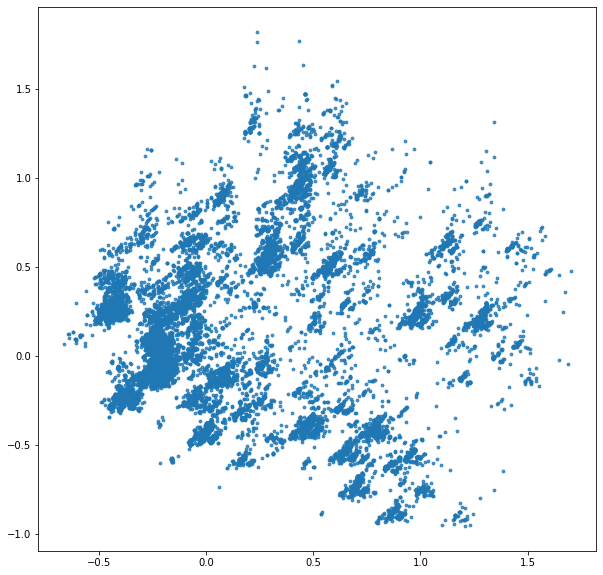

In [158]:
fig = plt.figure(figsize=(10, 10))          
plot_PCA(X_new_transformed)
plt.show()

2
1


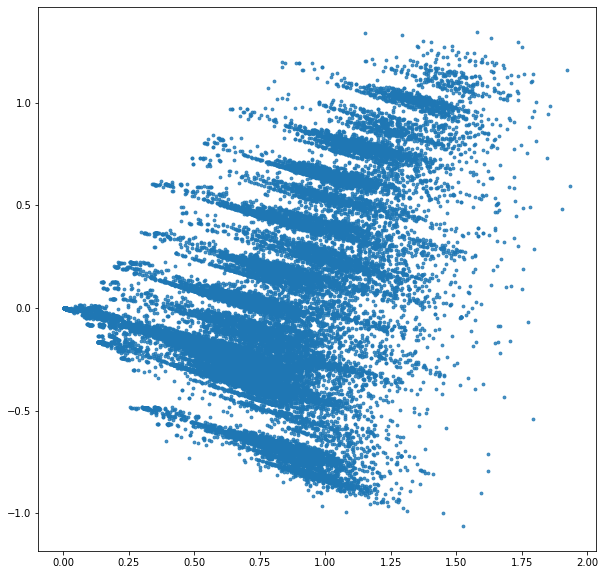

In [159]:
fig = plt.figure(figsize=(10, 10))      
plot_LSA(X_new_transformed)

In [160]:
sum_of_squared_distances_tr = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_new_transformed)
    sum_of_squared_distances_tr.append(km.inertia_)

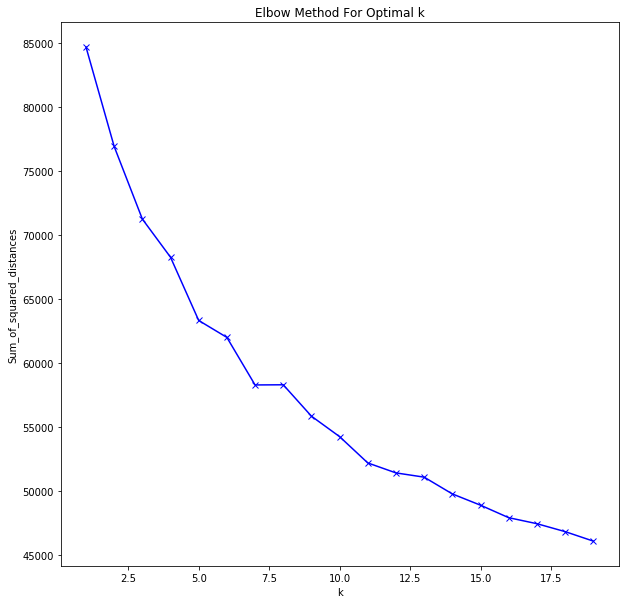

In [161]:
fig = plt.figure(figsize=(10, 10))      
plt.plot(K, sum_of_squared_distances_tr, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

2
1


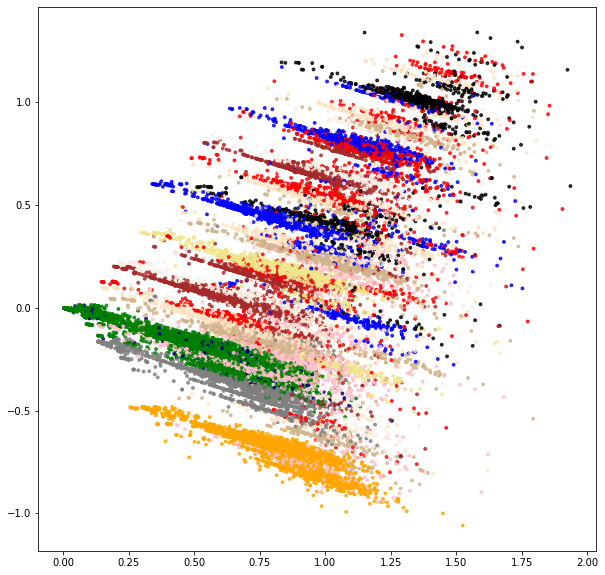

In [171]:
gmm2 = GaussianMixture(n_components=13,random_state=39) #27 - если ничего другого не подойдет для 5
gmm2.fit(X_new_transformed)

#predictions from gmm
gmm2_labels = gmm2.predict(X_new_transformed)
fig = plt.figure(figsize=(10, 10))        
plot_LSA(X_new_transformed, gmm2_labels, ['orange','blue', 'green', 'red', 'black', 'pink', 'brown', 'gray', 'tan', 'khaki', 'navy', 'linen', 'bisque'])

In [152]:
X_new['class_gaus_2'] = gmm2_labels

In [153]:
X_new.loc[X_new['class_gaus_2'] == 0].describe()

budget       revenue       runtime  vote_average    vote_count  \
count  3.316100e+04  3.316100e+04  33161.000000  33161.000000  33161.000000   
mean   4.017238e+06  1.040202e+07     94.704593      5.572371    108.121589   
std    1.773600e+07  6.580860e+07     42.280981      2.024819    517.142897   
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000   
25%    0.000000e+00  0.000000e+00     85.000000      5.000000      3.000000   
50%    0.000000e+00  0.000000e+00     95.000000      6.000000      8.000000   
75%    0.000000e+00  0.000000e+00    108.000000      6.800000     29.000000   
max    3.800000e+08  2.787965e+09   1256.000000     10.000000  14075.000000   

         cast_count  genres_count    crew_count  production_companies_count  \
count  33161.000000  33161.000000  33161.000000                33161.000000   
mean      11.636923      1.897289     10.421067                    1.547541   
std       11.622065      1.136256     16.466634                    1.822948   
min        0.000000      0.000000      0.000000                    0.000000   
25%        5.000000      1.000000      2.000000                    0.000000   
50%        9.000000      2.000000      6.000000                    1.000000   
75%       15.000000      3.000000     12.000000                    2.000000   
max      208.000000      7.000000    435.000000                   26.000000   

       production_countries_count  spoken_languages_count        profit  \
count                33161.000000            33161.000000  3.316100e+04   
mean                     1.098218                1.169205  6.384783e+06   
std                      0.819344                0.775484  5.323315e+07   
min                      0.000000                0.000000 -1.657101e+08   
25%                      1.000000                1.000000  0.000000e+00   
50%                      1.000000                1.000000  0.000000e+00   
75%                      1.000000                1.000000  0.000000e+00   
max                     15.000000               13.000000  2.550965e+09   

       gener Animation  gener Comedy  gener Family  gener Adventure  \
count     33161.000000       33161.0  33161.000000     33161.000000   
mean          0.043244           0.0      0.049003         0.082537   
std           0.203408           0.0      0.215878         0.275185   
min           0.000000           0.0      0.000000         0.000000   
25%           0.000000           0.0      0.000000         0.000000   
50%           0.000000           0.0      0.000000         0.000000   
75%           0.000000           0.0      0.000000         0.000000   
max           1.000000           0.0      1.000000         1.000000   

       gener Fantasy  gener Romance  gener Action   gener Crime  \
count   33161.000000   33161.000000  33161.000000  33161.000000   
mean        0.049486       0.112361      0.161877      0.105304   
std         0.216883       0.315815      0.368343      0.306950   
min         0.000000       0.000000      0.000000      0.000000   
25%         0.000000       0.000000      0.000000      0.000000   
50%         0.000000       0.000000      0.000000      0.000000   
75%         0.000000       0.000000      0.000000      0.000000   
max         1.000000       1.000000      1.000000      1.000000   

       gener Thriller  gener Horror  gener History  gener Science Fiction  \
count    33161.000000  33161.000000   33161.000000           33161.000000   
mean         0.215162      0.124152       0.040620               0.077621   
std          0.410941      0.329760       0.197411               0.267579   
min          0.000000      0.000000       0.000000               0.000000   
25%          0.000000      0.000000       0.000000               0.000000   
50%          0.000000      0.000000       0.000000               0.000000   
75%          0.000000      0.000000       0.000000               0.000000   
max          1.000000      1.000000       1.000000   

In [154]:
X_new.loc[X_new['class_gaus_2'] == 1].describe()

budget       revenue       runtime  vote_average    vote_count  \
count  1.346700e+04  1.346700e+04  13467.000000  13467.000000  13467.000000   
mean   4.524126e+06  1.256490e+07     90.718423      5.708577    108.260340   
std    1.607581e+07  5.854485e+07     29.152969      1.678306    400.825495   
min    0.000000e+00  0.000000e+00      0.000000      0.000000      0.000000   
25%    0.000000e+00  0.000000e+00     85.000000      5.200000      4.000000   
50%    0.000000e+00  0.000000e+00     94.000000      6.000000     13.000000   
75%    0.000000e+00  0.000000e+00    104.000000      6.700000     48.000000   
max    2.300000e+08  1.156731e+09    436.000000     10.000000  11444.000000   

         cast_count  genres_count    crew_count  production_companies_count  \
count  13467.000000  13467.000000  13467.000000                13467.000000   
mean      13.980248      2.259301      9.489790                    1.559070   
std       12.791774      1.082328     13.662183                    1.560831   
min        0.000000      1.000000      0.000000                    0.000000   
25%        7.000000      1.000000      3.000000                    1.000000   
50%       11.000000      2.000000      6.000000                    1.000000   
75%       17.000000      3.000000     12.000000                    2.000000   
max      313.000000      8.000000    244.000000                   26.000000   

       production_countries_count  spoken_languages_count        profit  \
count                13467.000000            13467.000000  1.346700e+04   
mean                     1.063711                1.171753  8.040775e+06   
std                      0.644375                0.688307  4.775964e+07   
min                      0.000000                0.000000 -1.040024e+08   
25%                      1.000000                1.000000  0.000000e+00   
50%                      1.000000                1.000000  0.000000e+00   
75%                      1.000000                1.000000  0.000000e+00   
max                     25.000000               19.000000  1.082731e+09   

       gener Animation  gener Comedy  gener Family  gener Adventure  \
count     13467.000000       13467.0  13467.000000     13467.000000   
mean          0.041880           1.0      0.089552         0.063117   
std           0.200323           0.0      0.285550         0.243183   
min           0.000000           1.0      0.000000         0.000000   
25%           0.000000           1.0      0.000000         0.000000   
50%           0.000000           1.0      0.000000         0.000000   
75%           0.000000           1.0      0.000000         0.000000   
max           1.000000           1.0      1.000000         1.000000   

       gener Fantasy  gener Romance  gener Action   gener Crime  \
count   13467.000000   13467.000000  13467.000000  13467.000000   
mean        0.055246       0.237395      0.101136      0.066459   
std         0.228469       0.425502      0.301520      0.249092   
min         0.000000       0.000000      0.000000      0.000000   
25%         0.000000       0.000000      0.000000      0.000000   
50%         0.000000       0.000000      0.000000      0.000000   
75%         0.000000       0.000000      0.000000      0.000000   
max         1.000000       1.000000      1.000000      1.000000   

       gener Thriller  gener Horror  gener History  gener Science Fiction  \
count    13467.000000  13467.000000   13467.000000           13467.000000   
mean         0.048934      0.047895       0.005940               0.042029   
std          0.215739      0.213552       0.076848               0.200662   
min          0.000000      0.000000       0.000000               0.000000   
25%          0.000000      0.000000       0.000000               0.000000   
50%          0.000000      0.000000       0.000000               0.000000   
75%          0.000000      0.000000       0.000000               0.000000   
max          1.000000      1.000000       1.000000   